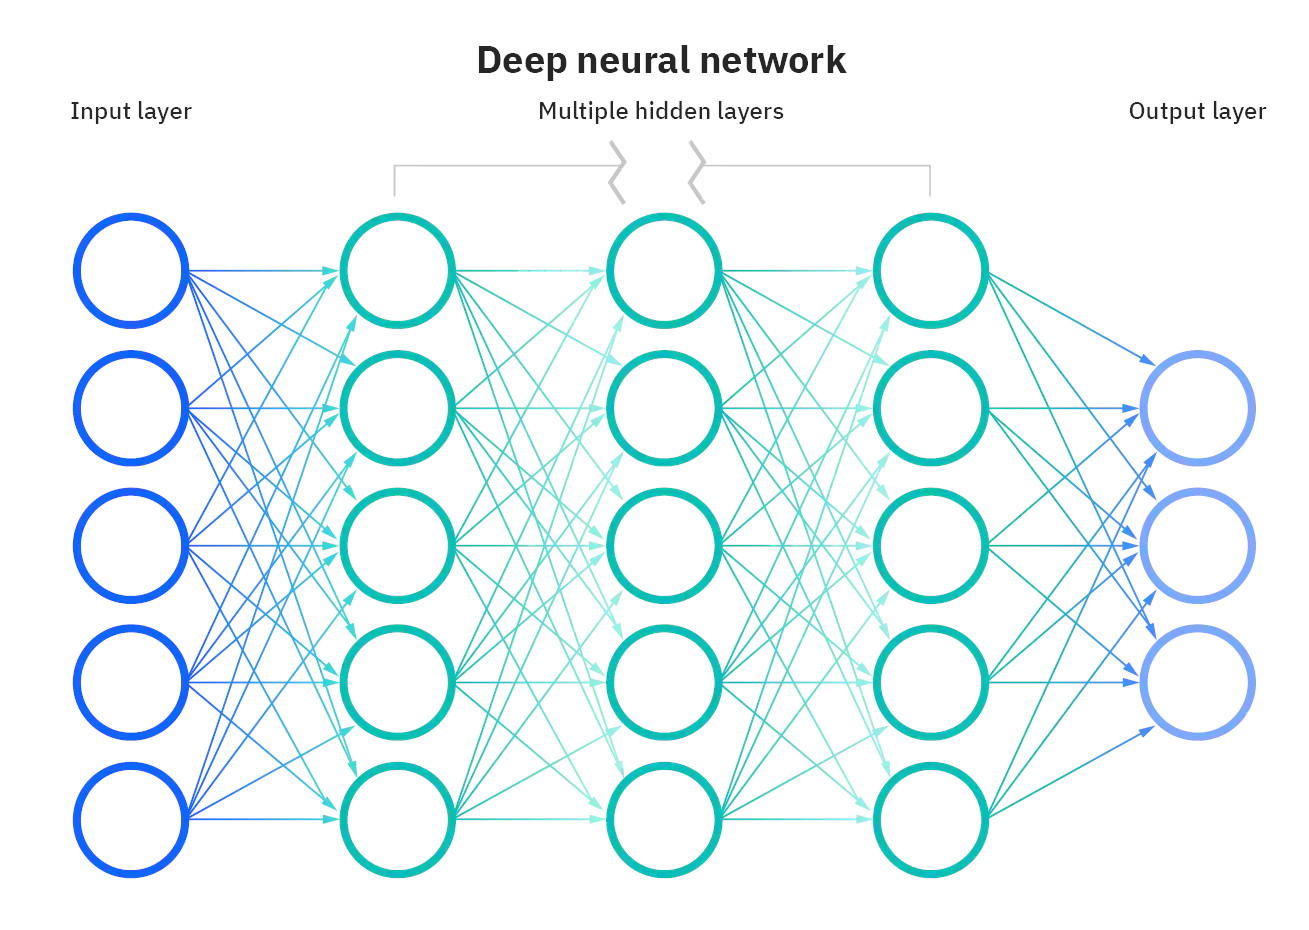

In [1]:
import IPython
from IPython import display
display.Image("./dnn.jpg")

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 5.10 Building a Machine Learning Algorithm

Nearly all deep learning algorithms can be described as particular instances of a fairly simple recipe: combine a specification of a:

* dataset
* cost function
* optimization procedure
* model

By realizing that we can replace any of these components mostly indepenently from the others, we can obtain a wide range of algorithms. The recipe for constructing a learning algorithm by combining models, costs, and optimization algorithms supports both supervised and unsupervised learning.

# 5.1 Learning algorithms

A computer program is said to learn from experience **E** with respect to some class of tasks **T** and performance measure **P**, if its performance at tasks in **T**, as measured by **P**, improves with experience **E**.

## 5.1.3 The Experience, E

A learning algorithm *experiences* a dataset. 

### Dataset

The MNIST is a dataset of handwritten digits that is commonly used for training various image processing systems. 

The database is also widely used for training and testing in the field of machine learning.

In [3]:
(train_images, train_labels), (validation_images, validation_labels) = tf.keras.datasets.mnist.load_data()

Train set size 60000 is around 85.7% of the data. Each data point has dimensions (28, 28)
Validation(Dev) set size 10000 is around 14.3% of the data. Each data point has dimensions (28, 28)
There are 10 classes. They are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


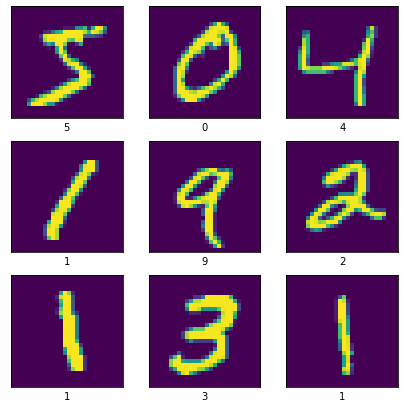

In [4]:
#dataset properties
train_ds_size = len(train_images)
validation_ds_size = len(validation_images)
class_names = list(set(train_labels))
ds_size = train_ds_size + validation_ds_size
print(f'Train set size {train_ds_size} is around {np.around(train_ds_size/ds_size * 100,1)}% of the data. Each data point has dimensions {train_images.shape[1:]}')
print(f'Validation(Dev) set size {validation_ds_size} is around {np.around(validation_ds_size/ds_size * 100,1)}% of the data. Each data point has dimensions {validation_images.shape[1:]}')
print(f'There are {len(class_names)} classes. They are {class_names}')

plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 5.1.2 The Performance Measure, P 

To evaluate the abilities of a machine learning algorithm, we must design a quantitative measure of its performance. 

We are interested in how well the machine learning algorithm performs on data that it has not seen before, since this determines how well it will work when deployed in the real world. 

We therefore evaluate these performance measures using a **test set** of data that is separate from the data used for training the machine learning system.


In [5]:
#Select a ratio of the validation set images to use as test images
ratio = 0.8
#New test set
test_images = validation_images[int(validation_ds_size * ratio):]
test_labels = validation_labels[int(validation_ds_size * ratio):]
#New validation set
validation_images=validation_images[:int(validation_ds_size * ratio)]
validation_labels=validation_labels[:int(validation_ds_size * ratio)]
#dataset properties
train_ds_size = len(train_images)
validation_ds_size = len(validation_images)
test_ds_size = len(test_images)
class_names = list(set(train_labels))
ds_size = train_ds_size + validation_ds_size + test_ds_size

print(f'Train set size {train_ds_size} is around {np.around(train_ds_size/ds_size * 100,1)}% of the data. Each data point has dimensions {train_images.shape[1:]}')
print(f'Validation(Dev) set size {validation_ds_size} is around {np.around(validation_ds_size/ds_size * 100,1)}% of the data. Each data point has dimensions {validation_images.shape[1:]}')
print(f'Test set size {test_ds_size} is around {np.around(test_ds_size/ds_size * 100,1)}% of the data. Each data point has dimensions {test_images.shape[1:]}')
print(f'There are {len(class_names)} classes. They are {class_names}')

Train set size 60000 is around 85.7% of the data. Each data point has dimensions (28, 28)
Validation(Dev) set size 8000 is around 11.4% of the data. Each data point has dimensions (28, 28)
Test set size 2000 is around 2.9% of the data. Each data point has dimensions (28, 28)
There are 10 classes. They are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Why? Much experimentation, show that

In [6]:
normalize = True
if normalize == True:
    train_images = train_images / 255.0
    validation_images = validation_images / 255.0
    test_images = test_images / 255.0

## 5.1.1 The Task, T

Machine learning enables us to tackle tasks that are too diﬃcult to solve with ﬁxed programs written and designed by human beings. Learning is our means of attaining the ability to perform the task.

### Classification

In [7]:
def build_model(num_classes=len(class_names), hidden_layers=1, units=128, data_shape=train_images.shape[1:]):
    model = tf.keras.Sequential()
    # input layer
    model.add(tf.keras.layers.InputLayer(input_shape=list(data_shape)))
    # MLP required shape
    model.add(tf.keras.layers.Flatten())
    
    #hidden layer(s)
    for hidden_layer in range(1,hidden_layers+1):
        model.add(tf.keras.layers.Dense(units, activation='relu'))
        
    #output layer
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax')) 
    #model.add(tf.keras.layers.Dense(num_classes, activation='softmax', kernel_regularizer=tf.keras.regularizers.L2(0.1))) 
    
    loss=tf.keras.losses.SparseCategoricalCrossentropy() 
    metrics=['accuracy']
    optimizer=tf.keras.optimizers.Adam()
    
    model.compile(loss=loss, metrics=metrics, optimizer=optimizer)
    
    return model

In [8]:
model = build_model()
# Verify that the network is as you imagined
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 10)                10250     
                                                                 
Total params: 2,913,290
Trainable params: 2,913,290
Non-trainable params: 0
_________________________________________________________________


### Supervised Learning of *p(y | x)*

In [9]:
history = model.fit(train_images, train_labels, epochs=30, batch_size=32, validation_data=(validation_images, validation_labels))

Epoch 1/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2850 - accuracy: 0.9385 - val_loss: 0.1425 - val_accuracy: 0.9647
Epoch 2/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1240 - accuracy: 0.9716 - val_loss: 0.1068 - val_accuracy: 0.9744
Epoch 3/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0882 - accuracy: 0.9796 - val_loss: 0.1129 - val_accuracy: 0.9729
Epoch 4/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0670 - accuracy: 0.9847 - val_loss: 0.1034 - val_accuracy: 0.9778
Epoch 5/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0541 - accuracy: 0.9878 - val_loss: 0.1202 - val_accuracy: 0.9726
Epoch 6/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0454 - accuracy: 0.9902 - val_loss: 0.0943 - val_accuracy: 0.9785
Epoch 7/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0423 - accuracy: 0.9905 - val_loss: 0.1017 -

## 5.2 Capacity, Overfitting and Underfitting

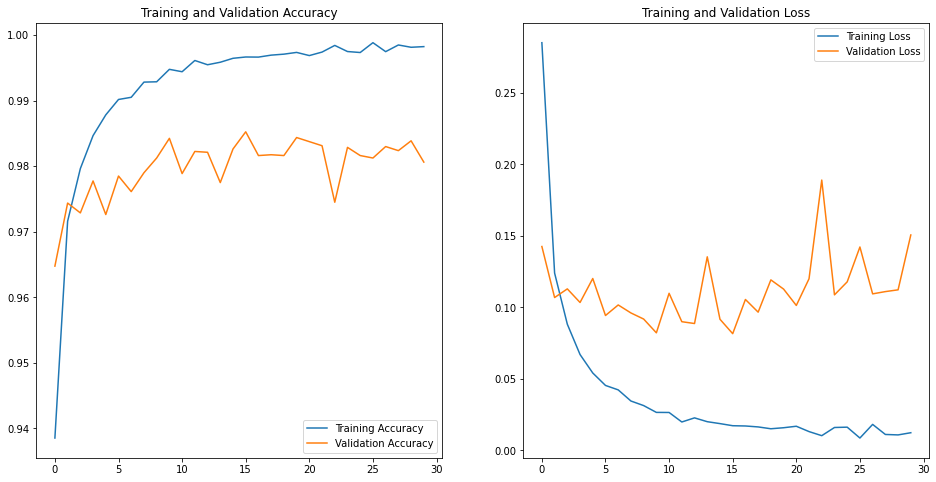

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 5.1.2 The Performance Measure, P 

In [11]:
model.evaluate(test_images, test_labels)

63/63 [==============================] - 0s 2ms/step - loss: 0.1106 - accuracy: 0.9860


[0.11060306429862976, 0.9860000014305115]

# Inference

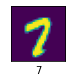

In [12]:
#Choose a random image from the test set
random_image_index = np.random.choice(test_ds_size)
random_image = test_images[random_image_index]
# Use the trained model to predict the label of an image
prediction = model.predict(random_image.reshape(1,28,28))
score = tf.nn.softmax(prediction[0])
predicted_label = list(score).index(max(score))
# See the results
plt.figure(figsize=(1,1))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(random_image)
plt.xlabel(class_names[predicted_label])
plt.show()